# Machine Learning: Classification

### 3.1 Churn Prediction

* Data from https://www.kaggle.com/blastchar/telco-customer-churn

### 3.2 Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
 df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# transpose the DataFrame to see the entire record of a single entity
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# make the data uniform by processing inconsistencies

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')


In [5]:
# verify dataset inconsistencies have been remove

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
# peruse the data types

df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
# zooming in on "totalcharges" data types. Speculating it contains strings, numbers, and maybe whitespaces, underscore, etc
df.totalcharges         

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [8]:
# attempt to convert "totalcharges" to numbers throws an error
# pd.to_numeric(df.totalcharges)

# ValueError: Unable to parse string "_" at position 488

In [9]:
# force pandas to replace values it can't parse with number

tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
# check for missing values in total charges
tc.isnull().sum()


np.int64(11)

In [11]:
# zoom-in on few columns in total charges with missing values

df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [12]:
# force pandas to replace values it can't parse with number

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [13]:
# fill the missing values in total charges with zeros

df.totalcharges = df.totalcharges.fillna(0)

In [14]:
# confirm the columns in total charges with missing values are filled

df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [15]:
# examine churn variables
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [16]:
# examine first 5 churn variables, converting yes/no to True/False
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [17]:
# convert the True/False churn variables to 1's and 0's
(df.churn == 'yes').astype('int').head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [18]:
# write the  1's and 0's churn variables back into churn
df.churn = (df.churn == 'yes').astype('int')

### 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [19]:
# using package :from sklearn.model_selection import train_test_split

# review sklearn train_test documentation
# ascertain what value to specify for "test_size" parameter
train_test_split?


Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [20]:
# specifying 20% for "test_size" parameter
# NOTE: The train_test_split function split data into, training and testing

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [21]:
# peruse the sizes of the dataset: df_full_train, df_test

len(df_full_train), len(df_test)

(5634, 1409)

In [22]:
# NOTE: since df_test size = 20%, df_full_train contains 80%
# df_full_train is further split into train (75% of df_full_train%) and val (25% of df_full_train)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [23]:
# confirm the sizes of the dataset: df_train, df_val and df_test
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [24]:
# the data for all 3 datasets are shuffled. Also notice "churn" is still included and index is not sequential.
df_train.head().T

,3897,1980,6302,727,5104
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


In [25]:
# reset the index for all 3 datasets. This has no impact on the performance.

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
# confirm data is sequential
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [27]:
# split the churn into datasets

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [28]:
# preview the data

y_train, y_val, y_test

(array([0, 0, 1, ..., 1, 0, 1]),
 array([0, 0, 0, ..., 0, 1, 1]),
 array([0, 0, 0, ..., 0, 0, 1]))

In [29]:
# delete y_train, y_val, and y_test from the datasets to avoid accidentally training the model with them, which would lead to overfitting

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [30]:
# confirm deletion of y_train i.e "churn". Now, notice that "churn" is not included and the dataset is also sequential

df_train.head().T # churn non-inclusion can also be confirmed with df_train.dtypes



,0,1,2,3,4
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


### 3.4 Exploratory Data Analysis (EDA)

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [31]:
# reset index for df_full_train

df_full_train = df_full_train.reset_index(drop=True)

In [32]:
# check for missing values in df_full_train. No additional data preparation is necessary as the only missing values found in column "totalcharges" has been managed.
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [33]:
# check for missing values in target variable "df_full_train.churn"
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int64

In [34]:
# examine the distribution "df_full_train.churn" to ascertain churning and non-churning users. How many times 1's and 0's occur
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [35]:
# ascertain the percentage distribution of churning and non-churning users. That is, ascertain the CHURN RATE
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

$$
\text{Global Churn Rate} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

In [36]:
# ALTERNATELY, ascertain the CHURN RATE by computing the mean
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [37]:
# examine the categorical and numerical variables
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [38]:
# create a list of numerical variables: tenure, monthlycharges, and totalcharges.

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [39]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [40]:
# create a list of categorical variable

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice',  'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

In [41]:
# view the categorical subset
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [42]:
# calculate the unique value of categorical subset
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature importance: Churn rate and risk ratio

**Feature importance analysis (part of EDA) - identifying which features affect our target variable**

* Churn rate
* Risk ratio
* Mutual information - Later 



* Churn rate

In [43]:
# examine churn rate within each / different groups
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [44]:
# compute the global churn rate irrespective of variable class (numerical or categorical)
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [45]:
# examine churn rate within gender: 
# compute churn rate within female customers
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [46]:
# compute churn rate within male customers
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [47]:
# less tha 1% difference between global churn rate and churn rates within female customers
diff_global_female = global_churn - churn_female

# INTERPRETATION: global_churn rate < zero implies female customers are MORE LIKELY to churn. But a negative  0.7% churn rate difference isn't so significant.
diff_global_female

np.float64(-0.006855983216553063)

In [48]:
# less than 1% difference between global churn rate and churn rates within male customers
diff_global_male = global_churn - churn_male

# INTERPRETATION: global_churn rate > zero implies male customers are LESS LIKELY to churn. But positive 0.7% churn rate difference isn't so significant.
diff_global_male

np.float64(0.006754520462819769)

In [49]:
# approximately 0.7% (less tha 1%) for female and male: an insignificant difference.

# INTERPRETATION: for gender, their rate is less than 1%, not only intangible but almost the same as any customer in the global customer base and so possesses little or no risk. Overall, gender is less significant a variable for impactful churn prediction outcomes.

# the focus is on how large the differences between the global churn rate and the churn rates of the variable it's compared against are.

diff_global_female, diff_global_male

(np.float64(-0.006855983216553063), np.float64(0.006754520462819769))

In [50]:
# Next, compute the churn rate within other variables: partners
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [51]:
# compute churn rate for partner variable: for customers with partner
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [52]:
# compute churn rate for partner variable: for customers with no partners
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [53]:
# approximate 6% difference between global churn rate and churn rates for customers with partners
diff_global_churn_partner = global_churn - churn_partner

# INTERPRETATION: global_churn rate > zero implies customers with partners are LESS LIKELY to churn. A positive 6% churn rate difference is highly significant.
diff_global_churn_partner

np.float64(0.06493474245795922)

In [54]:
# approximate 6% difference between global churn rate and rate for customers with no partners
diff_global_churn_no_partner = global_churn - churn_no_partner

# INTERPRETATION: global_churn rate < zero implies customers with no partners are MORE LIKELY to churn. A negative 6% churn rate difference is highly significant.
diff_global_churn_no_partner

np.float64(-0.05984095297455855)

* Risk ratio

In [55]:
# ratio churn rate: churn_no_partner / global_churn
ratio_churn_no_partner_to_global = churn_no_partner / global_churn

# INTERPRETATION: with ratio > 1 implies are MORE LIKELY to churn.Their churn rate is relatively 22% higher. This correlates with the strong negative 6% in absolute terms.
ratio_churn_no_partner_to_global

np.float64(1.2216593879412643)

In [56]:
# percentage churn rate: churn_partner / global_churn
ratio_churn_partner_to_global = churn_partner  / global_churn

# INTERPRETATION: with ratio < 1 implies are LESS LIKELY to churn. Their churn rate is relatively 24% lower than the global churn
ratio_churn_partner_to_global

np.float64(0.7594724924338315)

```sql
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk

FROM
    data

GROUP BY
    gender;

In [57]:
# compute the average churn by gender
df_full_train.groupby('gender').churn.mean() 

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [58]:
# convert the "average churn by gender" series into a DataFrame
df_full_train.groupby('gender').churn.agg(['mean','count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [59]:
# add the "average churn by gender" into a group DataFrame
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])

# add more groups to the DataFrame
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [60]:
# defining a function specific to Jupyter Notebook to display the "df_group" within the for loop
from IPython.display import display

In [61]:
# repeat the above analysis for all categorical variables
for c in categorical:
    print(c) # add the name of the variable being evaluated
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980





seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208





partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472





dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651





phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412





multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948





internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201





onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570





onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660





deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480





techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390





streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328





streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182





contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730





paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560





paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### 3.6 Feature importance: Mutual information

**Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another**

* https://en.wikipedia.org/wiki/Mutual_information

In [62]:
from sklearn.metrics import mutual_info_score

In [63]:
# indicates contract type provides significant information about chances of churning
mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.0983203874041556)

In [64]:
# indicates gender provides little or no information about chances of churning
mutual_info_score(df_full_train.gender, df_full_train.churn)

np.float64(0.0001174846211139946)

In [65]:
# indicates partner is relatively more important than gender but less than contract
mutual_info_score(df_full_train.partner, df_full_train.churn)

np.float64(0.009967689095399745)

In [66]:
# apply the technique of "mutual_info_score" analysis to all the categorical variables to ascertain the highest score

# define a function that takes a series
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [67]:
df_full_train[categorical].apply( mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [68]:
# sort so the most important variable or variable with the hightest score comes first
mi = df_full_train[categorical].apply( mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64


### 3.7 Feature importance: Correlation

**How about numerical columns?**

**Correlation coefficient Formula**

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

* $r$ = correlation coefficient
* $x_i$ = values of the x-variable in a sample
* $\bar{x}$ = mean of the values of the x-variable
* $y_i$ = values of the y-variable in a sample
* $\bar{y}$ = mean of the values of the y-variable

In [69]:
# check the value of tenure
df_full_train.tenure.max()

np.int64(72)

In [70]:
# correlation between numerical variables and churn rate
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [71]:
# people who have been with the company less than 2 months
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [72]:
# people who spent more than 2 months with the company
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [73]:
# people who stayed with the company between 2 AND 12 months
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [74]:
# people who stayed with the company more than 12 months
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

#### Monthly Charges

In [75]:
# monthly charges less than 20
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [76]:
# monthly charges more than 20
df_full_train[df_full_train.monthlycharges > 20].churn.mean()

np.float64(0.28859323028761497)

In [77]:
# monthly charges more than 20 and 50
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [78]:
# monthly charges more than 50
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

In [79]:
# correlation between numerical variables and churn rate wrt importance
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

### 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

In [80]:
# 
from sklearn.feature_extraction import DictVectorizer

In [81]:
# get first 10 variables
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [82]:
# transform it into a dictionary
df_train[['gender', 'contract']].iloc[:10].to_dict()


{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month'}}

In [83]:
# orient the columns of the dictionary into a row 
df_train[['gender', 'contract']].iloc[:10].to_dict(orient ='records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [84]:
# pass it into a dict variable
dicts = df_train[['gender', 'contract']].iloc[:10].to_dict(orient ='records')

In [85]:
# create a DictVectorizer: a dictionary transformed into a vector hence the name
dv = DictVectorizer()

In [86]:
# train the DictVectorizer by showing it what our data looks like so the DictVectorizer can infer the columns, rows and data types

dv.fit(dicts)

DictVectorizer()

In [87]:
# the transformation produces a sparse matrix, a special way of encoding data when there are many zeros

dv.transform(dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20 stored elements and shape (10, 4)>

In [88]:
# we are not using sparse matrices, so specify sparse=False
dv = DictVectorizer(sparse=False)

In [89]:
# with sparse=False, it returns a numpy array
dv.fit(dicts)
dv.transform(dicts)

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.]])

In [90]:
# pass in a larger dict variable: increase 10 to 100
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient ='records')


In [91]:
# notice the columns of the numpy array increase from 4 to 5: two for gender and three for contract

dv.fit(dicts)
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [92]:
# check the features names: first 3 are contracts, next 2 are gender

dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

#### Testing the sensitivity / smartness of the DictVectorizer()

In [93]:
# DictVectorizer is smart enough to pick up a changes in the dict passed 

# as an example, the tenure variable is included in the dict
df_train[['gender', 'contract', 'tenure']].iloc[:10]



,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
5,male,month-to-month,4
6,male,month-to-month,1
7,female,month-to-month,1
8,female,two_year,72
9,female,month-to-month,6


In [94]:
# increase data to 100
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient ='records')

In [95]:
# peruse the data in the dictionary following inclusion of tenure
dicts[0]

{'gender': 'female', 'contract': 'two_year', 'tenure': 72}

In [96]:
# initialize the DictVectorizer and fit the dicts
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [97]:
# transform it to numpy array
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

In [98]:
# DictVectorizer is smart enough to discern that tenure is a numerical variable
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

#### Passing more data into the DictVectorizer()

In [99]:
# use the train dataset that comprise the categorical and numerical data
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [100]:
# peruse the data in the train_dicts dictionary
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [101]:
# initialize the DictVectorizer
dv = DictVectorizer(sparse=False)

In [102]:
# fit the train_dicts dictionary
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [103]:
# DictVectorizer is smart enough to discern that tenure is a numerical variable
dv.get_feature_names_out()



array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [104]:
# transform it to numpy array
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [105]:
# get the first 5 of the transformed numpy array and convert the array to list
list(dv.transform(train_dicts[:5])[0])

[np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(115.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(72.0),
 np.float64(8425.15)]

In [106]:
# passing the fitted and transformed data into X_train
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
X_train.shape

(4225, 45)

In [107]:
# performing the fitting and transformation in one step
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [108]:
# use the validation dataset that comprise the categorical and numerical data
val_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [109]:
# perform transformation ONLY on the validation dataset 
X_val = dv.transform(val_dicts)
X_val.shape

(4225, 45)

### 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

In [110]:
# define the sigmoid

import warnings
warnings.filterwarnings("ignore", message="overflow encountered in exp")

def sigmoid(z):
    return 1/(1 + np.exp(-z))

The sigmoid is used to convert a score to a probability:

$$
\text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$

In [111]:
# get numbers from positive to negative range
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [112]:
# applying sigmoid to z, gives number between 0 and 1
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

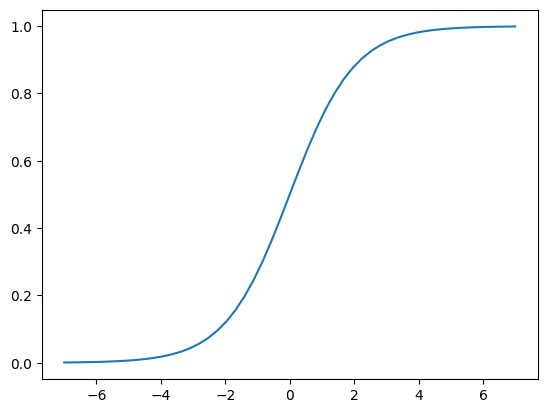

In [113]:
# plot the z
plt.plot(z, sigmoid(z))

In [114]:
# irrespective of the number or value of z, the sigmoid would always be between zero and one

a = sigmoid(1000) 
b = sigmoid(100) 
c = sigmoid(-100) 
d = sigmoid(-1000) 

a, b, c, d

(np.float64(1.0),
 np.float64(1.0),
 np.float64(3.7200759760208356e-44),
 np.float64(0.0))

In [115]:
# SIMILARITY BETWEEN LINEAR REGRESSION AND LOGISTIC REGRESSION MODELS

def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result += xi[j] * w[j]  # REASON WHY IT'S REFERRED TO AS A LINEAR MODEL

    return result

In [116]:
# define logistic regression

def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score += xi[j] * w[j] # REASON WHY IT'S REFERRED TO AS A LINEAR MODEL

    result = sigmoid(score)
    return result

### 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [117]:
# 
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

In [118]:
# commence model training
# model = LogisticRegression()
# model.fit(X_train, y_train)

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)



LogisticRegression(random_state=1, solver='liblinear')

In [119]:
#
model.intercept_[0]

np.float64(-0.12193582079399948)

In [120]:
# peruse the weights
model.coef_[0].round(3)

array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

In [121]:
# HARD PREDICTIONS because we already have there exact labels. We need to learn their probability for them to be referred to as SOFT PREDICTION
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [122]:
# SOFT PREDICTION: a two-dimensional matrix with two columns
# the first column (left) refers to the probability of being negative
# the second column (right) refers to the probability of being positive
# NOTE: the second column (right colum) is what we are interested in, which represents the probability of CHURN

model.predict_proba(X_train)

array([[0.92153546, 0.07846454],
       [0.32154183, 0.67845817],
       [0.36810142, 0.63189858],
       ...,
       [0.48984548, 0.51015452],
       [0.97233189, 0.02766811],
       [0.29778699, 0.70221301]])

In [123]:
# we extract the second column (right colum) that we are interested in
model.predict_proba(X_train)[:, 1]


array([0.07846454, 0.67845817, 0.63189858, ..., 0.51015452, 0.02766811,
       0.70221301])

In [124]:
# repeat procedure for x_val

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [125]:
# SOFT PREDICTION
model.predict_proba(X_val)

array([[0.99264109, 0.00735891],
       [0.79028213, 0.20971787],
       [0.77929527, 0.22070473],
       ...,
       [0.85112081, 0.14887919],
       [0.21516074, 0.78483926],
       [0.18941947, 0.81058053]])

In [126]:
# the second column /(right colum) is now used to decide above each threshold to define people as churning
y_pred = model.predict_proba(X_val)[:, 1]

In [127]:
y_pred

array([0.00735891, 0.20971787, 0.22070473, ..., 0.14887919, 0.78483926,
       0.81058053])

In [128]:
# 
y_pred >= 0.5

array([False, False, False, ..., False,  True,  True])

In [129]:
# churn decision
churn_decision = (y_pred >= 0.5)

In [130]:
# insert DataFrame
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
24,2612-ranwt,female,0,no,no,12,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),100.15,1164.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [131]:
# get the customers ID of all the people we believe are going to churn
# This are the people that would receive the PROMOTIONAL EMAIL WITH DISCOUNT 25%

df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 312, dtype: object

In [132]:
# check prediction accuracy measurement using the actual and churn prediction

y_val   # actual values

array([0, 0, 0, ..., 0, 1, 1])

In [133]:
# the churn prediction explicitly converted to integer
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [134]:
# churn prediction compared with actual (y_val) for matches
# express the prediction accuracy in boolean

(y_val == churn_decision.astype(int))

array([ True,  True,  True, ...,  True,  True,  True])

In [135]:
# compute the mean of the prediction accuracy
(y_val == churn_decision.astype(int)).mean()

np.float64(0.8055358410220014)

In [136]:
# further analyse the mean matches
df_pred = pd.DataFrame()

df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val


In [137]:
df_pred

,probability,prediction,actual
0,0.007359,0,0
1,0.209718,0,0
2,0.220705,0,0
3,0.575035,1,1
4,0.216668,0,0
...,...,...,...
1404,0.295302,0,0
1405,0.040020,0,1
1406,0.148879,0,0
1407,0.784839,1,1


In [138]:
# visibly identify all the correct prediction
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [139]:
df_pred

,probability,prediction,actual,correct
0,0.007359,0,0,True
1,0.209718,0,0,True
2,0.220705,0,0,True
3,0.575035,1,1,True
4,0.216668,0,0,True
...,...,...,...,...
1404,0.295302,0,0,True
1405,0.040020,0,1,False
1406,0.148879,0,0,True
1407,0.784839,1,1,True


In [140]:
# display the correct prediction
df_pred.correct

0        True
1        True
2        True
3        True
4        True
        ...  
1404     True
1405    False
1406     True
1407     True
1408     True
Name: correct, Length: 1409, dtype: bool

In [141]:
# explicit conversion from boolean to integer on correct prediction
df_pred.correct.astype('int')

0       1
1       1
2       1
3       1
4       1
       ..
1404    1
1405    0
1406    1
1407    1
1408    1
Name: correct, Length: 1409, dtype: int64

In [142]:
# ascertain the fraction of the correct prediction
df_pred.correct.astype('int').mean()

np.float64(0.8055358410220014)

In [143]:
# alternatively, without explicit conversion
df_pred.correct.mean()

np.float64(0.8055358410220014)

In [144]:
# model is 80% correct: in 80% of the cases, when the model says a person is "going to churn" or "not going to churn", it is actually true.


### 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [145]:
# dictionary converted to vector: DictVectorizer
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [146]:
# coefficient
model.coef_[0].round(3)

array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

In [147]:
# zip refresher

a = [1, 2, 3, 4]
b = 'abcd'

In [148]:
# creates a tuple with elements from a and b
list(zip(a, b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [149]:
# similarly, create a dictionary by converting a=keys and b=values
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [150]:
# combine the DictVectorizer and Coefficient using zip and convert to dictionary

dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.607),
 'contract=one_year': np.float64(-0.058),
 'contract=two_year': np.float64(-0.671),
 'dependents=no': np.float64(-0.028),
 'dependents=yes': np.float64(-0.094),
 'deviceprotection=no': np.float64(0.052),
 'deviceprotection=no_internet_service': np.float64(-0.103),
 'deviceprotection=yes': np.float64(-0.071),
 'gender=female': np.float64(-0.042),
 'gender=male': np.float64(-0.08),
 'internetservice=dsl': np.float64(-0.376),
 'internetservice=fiber_optic': np.float64(0.357),
 'internetservice=no': np.float64(-0.103),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.248),
 'multiplelines=no_phone_service': np.float64(0.133),
 'multiplelines=yes': np.float64(-0.008),
 'onlinebackup=no': np.float64(0.057),
 'onlinebackup=no_internet_service': np.float64(-0.103),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.217),
 'onlinesecurity=no_internet_service': np.float64(-0.103),
 'onlinesecurity=yes

In [151]:
# train a small subset of the model
small = ['contract', 'tenure', 'monthlycharges']

In [152]:
# peruse top 10 subset
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [153]:
# convert the subset of the train dictionary to records
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [154]:
# convert the subset of the validation dictionary to records
df_val[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 71, 'monthlycharges': 70.85},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 20.75},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 20.35},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 75.7},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 19.9},
 {'contract': 'month-to-month', 'tenure': 16, 'monthlycharges': 49.45},
 {'contract': 'one_year', 'tenure': 39, 'monthlycharges': 41.15},
 {'contract': 'two_year', 'tenure': 68, 'monthlycharges': 25.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 99.95},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 45.7}]

In [155]:
# take all of the train and validation dictionary assigned to variables
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_val[small].to_dict(orient='records')

In [156]:
# define the DictVectorizer and fit it on training dataset
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [157]:
# peruse the features
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [158]:
# get the feature matrix for the X train
X_train_small = dv_small.transform(dict_train_small)

In [159]:
# train the model
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [160]:
# peruse the bias term or intercept: i.e., what we know about the customer without assuming any probabilities

w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575963580487)

In [161]:
# peruse the co-efficient, i.e the vectors
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [162]:
# combine the bias and vector to get the weights
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [163]:
# the probability of a customer leaving the company, approx 6%
# sigmoid(w0)
sigmoid(-2.47)

np.float64(0.07798823512936635)

### 3.12 Using the model

In [164]:
# STEP 1
# training the model on the feature matrix
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [165]:
# STEP 2
# display a subset
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [166]:
# STEP 3
# create a DictVectorizer and fit the transformer
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
X_full_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 2.58350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.20000e+01, 3.16055e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 4.68175e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]])

In [167]:
# STEP 4
y_full_train = df_full_train.churn.values

In [168]:
# STEP 5

# train the model
# model = LogisticRegression(solver='liblinear', random_state=1).fit(X_full_train,y_full_train)

# alternately 
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_full_train, y_full_train)

LogisticRegression(random_state=1, solver='liblinear')

In [169]:
# repeat STEP 1 to STEP 3 for the test dataset

# STEP 1 : training the model on the feature matrix
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

# STEP 2 : display a subset - SKIPPED
# dicts_test[:3]

# STEP 3 : create a DictVectorizer and fit the transformer
X_test = dv.transform(dicts_test)
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.10000e+01, 3.32075e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.60000e+01, 6.47185e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 5.24350e+02],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 3.88865e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.50000e+01, 5.68845e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.70000e+01, 1.74350e+03]])

In [170]:
# STEP 4 : predict
y_pred = model.predict_proba(X_test)[:, 1]
y_pred

array([0.0616628 , 0.14615918, 0.34730804, ..., 0.00703894, 0.18599772,
       0.62797728])

In [171]:
# churn decision: clients with probability greater than 0.5 will churn
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False, False,  True])

In [172]:
# compare with y_test: computing accuracy
(churn_decision == y_test).mean()

np.float64(0.8133427963094393)

In [173]:
# USING THE MODEL: use a sample from the test dataset
dicts_test[10]


{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [174]:
customer1 = dicts_test[10]

# get 
X_small = dv.transform([customer1])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [175]:
model.predict_proba(X_small)


array([[0.54872363, 0.45127637]])

In [176]:
# 45% probability of churning
model.predict_proba(X_small)[0, 1]

np.float64(0.45127636572733054)

In [177]:
# a check whether the customer was planning to churn proved he wasn't. This supports the prediction and model accuracy
y_test[10]

np.int64(0)

In [178]:
# TEST 2: 
customer2 = dicts_test[-1]

# get 
X_small = dv.transform([customer2])
X_small

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [179]:
# 62% probability of churning
model.predict_proba(X_small)[0, 1]

np.float64(0.6279772773169112)

In [180]:
# a check whether customer2 was planning to churn proved the prediction and model accuracy: that the customer2 was planing to churn
y_test[-1]

np.int64(1)

### 3.13 Summary

* **Feature importance:** risk, mutual information, correlation
* **One-hot encoding:** can be implemented with `DictVectorizer`
* **Logistic regression:** linear model like linear regression
* **Output of log reg:** probability
* **Interpretation of weights:** is similar to linear regression